In [1]:
from scipy.special import comb
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def binomial_distribution(amount_of_tests, amount_required, chance_of_happening):
    return comb(amount_of_tests, amount_required)*(chance_of_happening**amount_required)*((1-chance_of_happening)**(amount_of_tests-amount_required))

def CDF(amount_of_tests, possible_amounts, chance_of_happening):
    return binomial_distribution(amount_of_tests, possible_amounts, chance_of_happening).sum()

def expected_value(values, chances):
    return (values*chances).sum()

# Question 1:

In [12]:
print(f"a). Probability of getting number side 3 times: {binomial_distribution(10, 3, 0.5)}")
print(f"b). Probability of getting number side at most 3 times: {CDF(10, np.array([0, 1, 2, 3]), 0.5)}")
print(f"c). Expected amount of number side when filpping 10 times: {10*expected_value(np.array([0, 1]), np.array([0.5, 0.5]))}")

a). Probability of getting number side 3 times: 0.1171875
b). Probability of getting number side at most 3 times: 0.171875
c). Expected amount of number side when filpping 10 times: 5.0


# Question 2:

In [14]:
print(f"a). Probability of this result: {binomial_distribution(200, 30, 0.1)}")
print(f"b). Probability of worse result: {CDF(200, np.array([i for i in range(31, 201)]), 0.1)}")

a). Probability of this result: 0.006818253984792689
b). Probability of worse result: 0.009508311946973732


# Question 3:

In [17]:
print(f"a). Probability of getting at least one 6: {CDF(4, np.array([1, 2, 3, 4]), 1/6)}")
print(f"b). Probability of getting at least one double 6: {CDF(24, np.array([i for i in range(1, 25)]), 1/36)}")

a). Probability of getting at least one 6: 0.5177469135802469
b). Probability of getting at least one double 6: 0.4914038761309031


# Question 4:

In [ ]:
# The original assumption is wrong since different orders (i.e. (1, 4, 5) should be counted as different from (5, 1, 4)) should
# be counted multiple times.

count_tens = 0
count_nines = 0
for i in range(1, 7):
    for j in range(1, 7):
        for k in range(1, 7):
            if (i+j+k == 9):
                count_nines += 1
            elif (i+j+k == 10):
                count_tens += 1

print(f"Ways to create nine: {count_nines}")
print(f"Ways to create ten: {count_tens}")

Ways to create nine: 25
Ways to create ten: 27


# Question 5:

In [29]:
# a).

# this shows that even after infinite tries, the game is considered fair
print(f"expected amount to win (acounting for cost): {1-expected_value(np.array([0, 0, 0, 0, 0, 6]), np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]))}")

expected amount to win (acounting for cost): 0.0


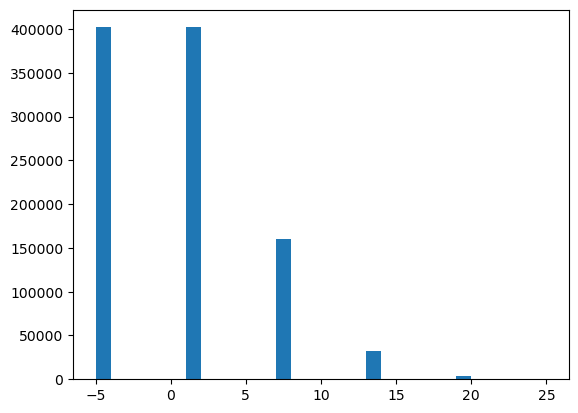

5.002017941238916


In [46]:
# b).

def get_amount_won(student):
    return 6*(np.sum(student == 6)) - 1*np.size(student)

student_amount = 1_000_000
rolls_amount = 5

rolls = np.random.randint(1, 7, (student_amount, rolls_amount))

winnings = np.apply_along_axis(get_amount_won, 1, rolls)
plt.hist(winnings, bins=range(-rolls_amount, (6*rolls_amount)-rolls_amount+1))
plt.show()
print(np.std(winnings))

In [48]:
# c).

print(f"Probability for student to lose all money: {binomial_distribution(5, 5, 5/6)}")

Probability for student to lose all money: 0.401877572016461
